In [5]:
import random
import os
import matplotlib.pylab as plt
from glob import glob
import numpy as np
import webcolors
from PIL import Image
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 15, 30

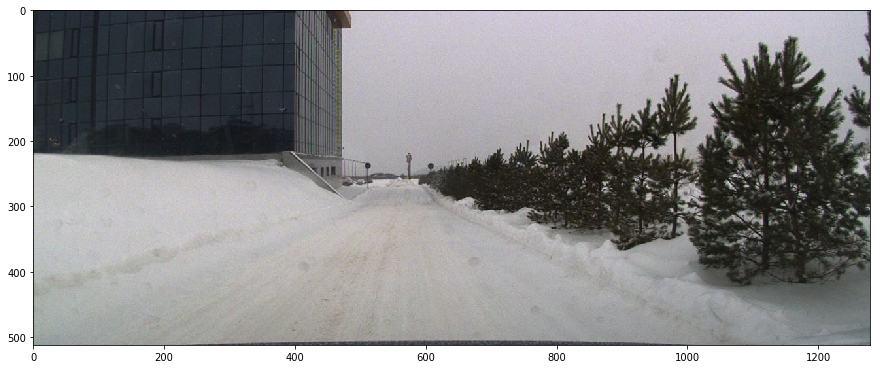

In [7]:
name = '2018-12-10-5'
name = '2018-12-10-102'
path = '/home/kenny/Desktop/lanes-segmentation/data/images/2018-12-10/' + name + '.png'
img = Image.open(path)
image = np.array(img)
plt.imshow(image)

In [9]:
from albumentations import (
    OneOf,
    CLAHE,
    RandomContrast,
    RandomGamma,
)

In [15]:
def visualize(image, original_image):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 1, figsize=(15, 15))

        ax.imshow(image)
        
    else:
        f, ax = plt.subplots(2, 1, figsize=(15, 15))

        ax[0].imshow(original_image)
        ax[0].set_title('Original image', fontsize=fontsize)
        
        ax[1].imshow(image)
        ax[1].set_title('Transformed image', fontsize=fontsize)

# Non-spatial stransformations

## CLAHE

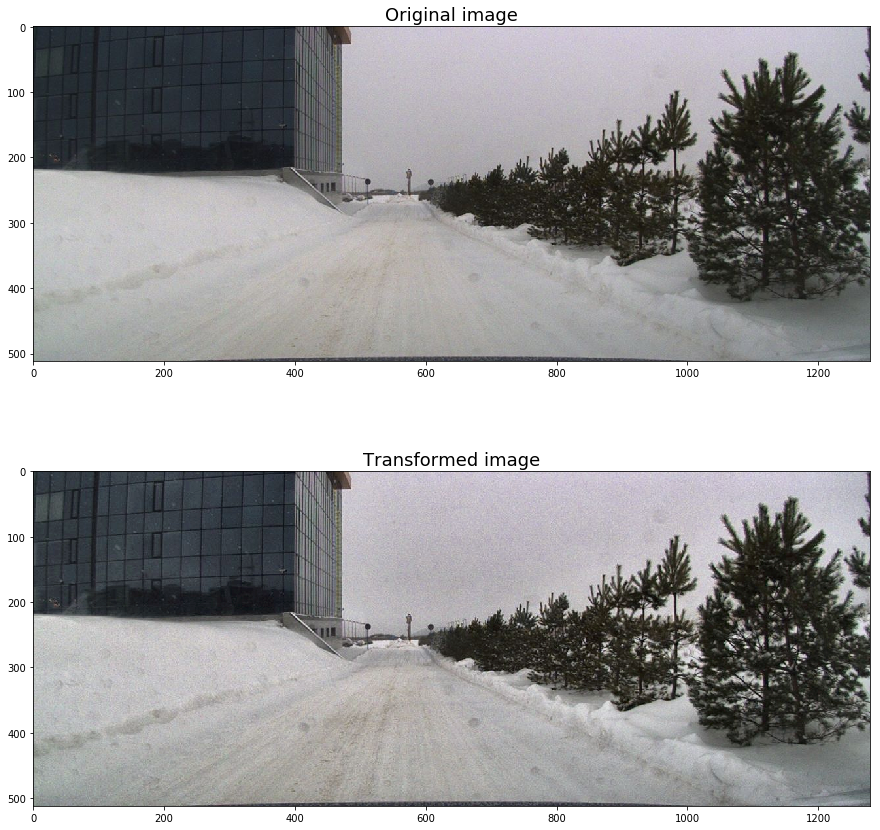

In [16]:
aug = CLAHE(p=1, clip_limit=4.)

augmented = aug(image=image)

image_clahe = augmented['image']

visualize(image_clahe, original_image=image)

In [29]:
show = Image.fromarray(image_clahe)
show.save("clahe", "PNG")

## RandomContrast

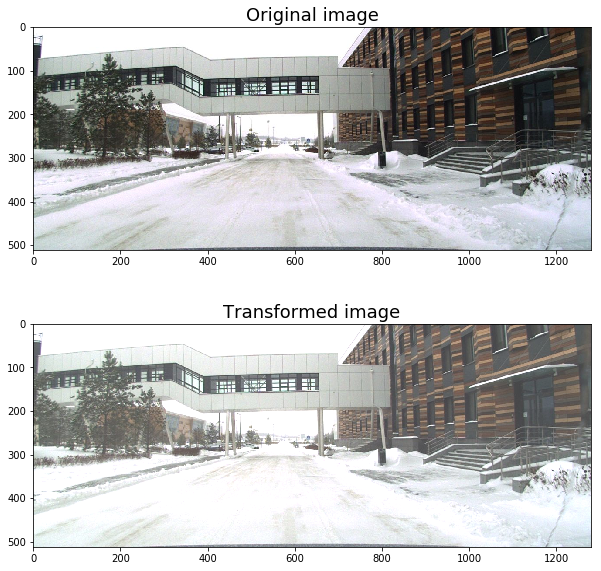

In [34]:
aug = RandomContrast(p=1., limit=0.25)

augmented = aug(image=image)

image_rc = augmented['image']

visualize(image_rc, original_image=image)

In [35]:
show = Image.fromarray(image_rc)
show.save("randomcontrast", "PNG")

## RandomGamma

In [ ]:
aug = RandomGamma(p=1., gamma_limit=(50,200))

augmented = aug(image=image)

image_rg = augmented['image']

visualize(image_rg, original_image=image)

# Combination

In [ ]:
aug = Compose([
    OneOf([RandomSizedCrop(min_max_height=(50, 101), height=original_height, width=original_width, p=0.5),
          PadIfNeeded(min_height=original_height, min_width=original_width, p=0.5)], p=1),    
    VerticalFlip(p=0.5),              
    RandomRotate90(p=0.5),
    OneOf([
        ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        GridDistortion(p=0.5),
        OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)                  
        ], p=0.8),
    CLAHE(p=0.8),
    RandomContrast(p=0.8),
    RandomBrightness(p=0.8),
    RandomGamma(p=0.8)])

augmented = aug(image=image, mask=mask)

image_heavy = augmented['image']
mask_heavy = augmented['mask']

visualize(image_heavy, mask_heavy, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_heavy))